In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2|

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
from omama import gp2
from omama.gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(classifier='kunet',
           discriminator='cnn',
           activation='relu',
           use_batch_norm=True,
           upsample_mode='deconv',
           dropout=0.3,
           dropout_change_per_layer=0.0,
           dropout_type='spatial',
           use_dropout_on_upsampling=False,
           use_attention=False,
           filters=16,
           num_layers=4,
           output_activation='sigmoid',
           optimizer=None,
           loss=None,
           metric=None,
           verbose=False
          )

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------
*** GP2 Keras UNet ***
Working directory: /tmp/tmp8457vw3xGP2


In [4]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Breast_Ultrasound_Images/Breast_Ultrasound_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Breast_Ultrasound_Images/Breast_Ultrassound_masks.npy')

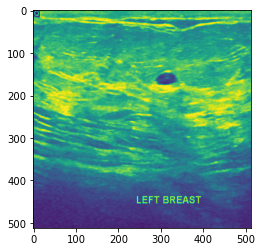

In [5]:
imshow(images[0])

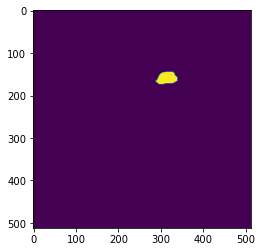

In [6]:
imshow(masks[0])

In [7]:
images.shape

(1457, 512, 512, 1)

In [8]:
masks.shape

(1457, 512, 512, 1)

In [9]:
R.run(images=images, masks=masks, runs=7, use_multi_gpu=True)

Number of devices: 3
Weights OK!
******
Loop 1
Epoch 1/100
2/2 [==============================] - 15s 4s/step - loss: 0.8629 - dice_coeff: 0.0549 - val_loss: 0.4989 - val_dice_coeff: 0.0837
Epoch 2/100
2/2 [==============================] - 1s 626ms/step - loss: 0.8402 - dice_coeff: 0.0610 - val_loss: 0.5091 - val_dice_coeff: 0.0836
Epoch 3/100
2/2 [==============================] - 1s 782ms/step - loss: 0.8398 - dice_coeff: 0.0504 - val_loss: 0.5198 - val_dice_coeff: 0.0834
Epoch 4/100
2/2 [==============================] - 1s 631ms/step - loss: 0.8287 - dice_coeff: 0.0569 - val_loss: 0.5302 - val_dice_coeff: 0.0833
Epoch 5/100
2/2 [==============================] - 1s 631ms/step - loss: 0.8357 - dice_coeff: 0.0793 - val_loss: 0.5401 - val_dice_coeff: 0.0831
Epoch 6/100
2/2 [==============================] - 1s 637ms/step - loss: 0.8190 - dice_coeff: 0.0508 - val_loss: 0.5490 - val_dice_coeff: 0.0830
Epoch 7/100
2/2 [==============================] - 1s 702ms/step - loss: 0.8264 - dic

3/3 [==============================] - 2s 582ms/step - loss: 0.7155 - dice_coeff: 0.0745 - val_loss: 0.5867 - val_dice_coeff: 0.0811
Epoch 12/100
3/3 [==============================] - 2s 561ms/step - loss: 0.7124 - dice_coeff: 0.0530 - val_loss: 0.5862 - val_dice_coeff: 0.0812
Epoch 13/100
3/3 [==============================] - 2s 599ms/step - loss: 0.7099 - dice_coeff: 0.0977 - val_loss: 0.5838 - val_dice_coeff: 0.0812
Epoch 14/100
3/3 [==============================] - 2s 542ms/step - loss: 0.7109 - dice_coeff: 0.0641 - val_loss: 0.5820 - val_dice_coeff: 0.0813
Epoch 15/100
3/3 [==============================] - 2s 562ms/step - loss: 0.7081 - dice_coeff: 0.0709 - val_loss: 0.5800 - val_dice_coeff: 0.0813
Epoch 16/100
3/3 [==============================] - 2s 583ms/step - loss: 0.7089 - dice_coeff: 0.0523 - val_loss: 0.5790 - val_dice_coeff: 0.0814
Epoch 17/100
3/3 [==============================] - 2s 542ms/step - loss: 0.7016 - dice_coeff: 0.0576 - val_loss: 0.5781 - val_dice_coeff

Epoch 5/100
3/3 [==============================] - 2s 664ms/step - loss: 0.6450 - dice_coeff: 0.0918 - val_loss: 0.5312 - val_dice_coeff: 0.0774
Epoch 6/100
3/3 [==============================] - 2s 667ms/step - loss: 0.6415 - dice_coeff: 0.0959 - val_loss: 0.5316 - val_dice_coeff: 0.0774
Epoch 7/100
3/3 [==============================] - 2s 659ms/step - loss: 0.6412 - dice_coeff: 0.0810 - val_loss: 0.5309 - val_dice_coeff: 0.0773
Epoch 8/100
3/3 [==============================] - 2s 642ms/step - loss: 0.6394 - dice_coeff: 0.0838 - val_loss: 0.5298 - val_dice_coeff: 0.0773
Epoch 9/100
3/3 [==============================] - 2s 665ms/step - loss: 0.6384 - dice_coeff: 0.0937 - val_loss: 0.5272 - val_dice_coeff: 0.0774
Epoch 10/100
3/3 [==============================] - 2s 660ms/step - loss: 0.6376 - dice_coeff: 0.0870 - val_loss: 0.5248 - val_dice_coeff: 0.0773
Epoch 11/100
3/3 [==============================] - 2s 644ms/step - loss: 0.6383 - dice_coeff: 0.0868 - val_loss: 0.5238 - val_di

In [10]:
R.classifier_scores

[[0.5883275866508484, 0.1086515560746193],
 [0.6114088296890259, 0.10346990078687668],
 [0.6210157871246338, 0.09845327585935593],
 [0.6162276864051819, 0.09791403263807297],
 [0.536323606967926, 0.09288851916790009],
 [0.5350735783576965, 0.09250737726688385],
 [0.5263029932975769, 0.08915700763463974]]

In [11]:
R.discriminator_scores

[[5.361872808862245e-06, 1.0],
 [0.0, 1.0],
 [0.0524555966258049, 0.9885057210922241],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0]]

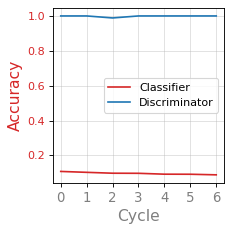

In [12]:
R.plot() 